In [1]:
import numpy as np
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

In [2]:
digits_data = load_digits()

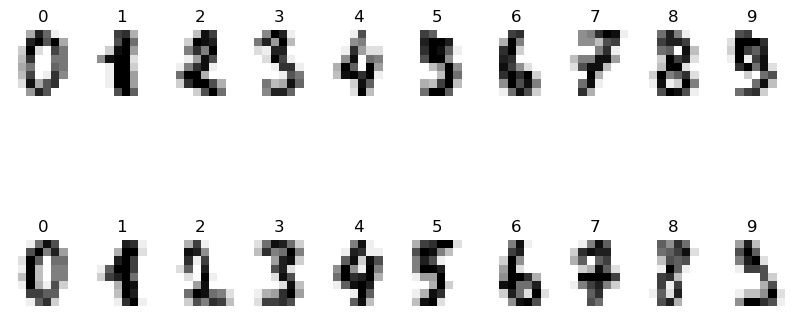

In [3]:
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10,5))
# 将 axes 转换为一维数组，便于循环
axes = axes.flatten()
for ax, image, label in zip(axes, digits_data.images, digits_data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray_r', interpolation='nearest')
    ax.set_title(label)

In [4]:
# n_samples = len(digits_data.images)
# data = digits_data.images.reshape((n_samples, -1))

x_train,x_test,y_train,y_test = train_test_split(digits_data.data,digits_data.target,test_size=0.25,random_state=40)
# 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [5]:
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
# 训练模型
model.fit(x_train, y_train)

SVC()

In [6]:
# 预测测试集
y_pred = model.predict(x_test)

# 评估模型
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      1.00      0.97        56
           2       1.00      0.95      0.98        42
           3       1.00      1.00      1.00        48
           4       0.94      1.00      0.97        45
           5       0.97      1.00      0.99        37
           6       0.98      1.00      0.99        47
           7       1.00      1.00      1.00        45
           8       0.98      0.91      0.95        47
           9       1.00      0.93      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

Accuracy: 0.98


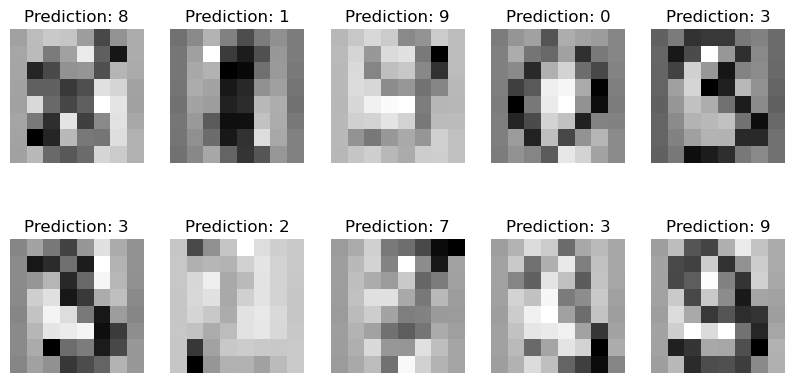

In [9]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,5))
# 将 axes 转换为一维数组，便于循环
axes = axes.flatten()
for ax, image, prediction in zip(axes, x_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap='gray_r', interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  2  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  0  0  1  0  0  0 43  0]
 [ 0  0  0  0  0  1  1  0  1 43]]


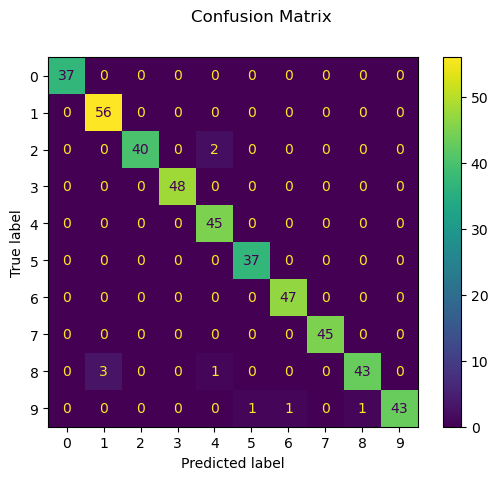

In [8]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()